**The simplest solutions are usually the most powerful ones, and Naive Bayes is a good example of that.** 

In spite of the great advances of machine learning in the last years, it has proven to not only be simple but also fast, accurate, and reliable. It has been successfully used for many purposes, but it works particularly well with natural language processing (NLP) problems.

Naive Bayes is a family of probabilistic algorithms that take advantage of probability theory and Bayes’ Theorem to predict the tag of a text (like a piece of news or a customer review). They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature.

We're going to be working with an algorithm called Multinomial Naive Bayes. We’ll walk through the algorithm applied to NLP with an example, 

## A Simple Example

Let’s see how this works in practice with a simple example. Suppose we are building a classifier that says whether a text is about sports or not. Our training data has 5 sentences:

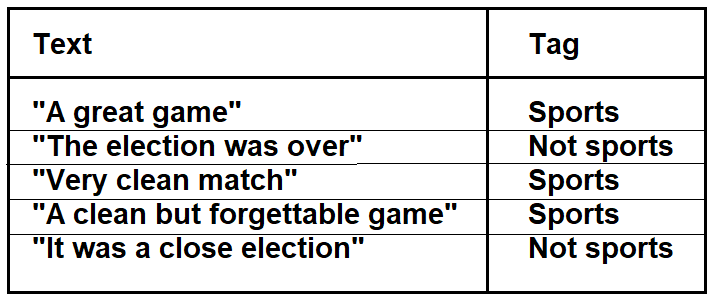

**Now, which tag does the sentence A very close game belong to?**

Since Naive Bayes is a probabilistic classifier, we want to calculate the probability that the sentence "A very close game" is Sports and the probability that it’s Not Sports. Then, we take the largest one. Written mathematically, what we want is P (Sports | a very close game) — the probability that the tag of a sentence is Sports given that the sentence is “A very close game”.

That’s great, but how do we calculate these probabilities?

## Feature Engineering

The first thing we need to do when creating a machine learning model is to decide what to use as features. We call features the pieces of information that we take from the text and give to the algorithm so it can work its magic. For example, if we were doing classification on health, some features could be a person’s height, weight, gender, and so on. We would exclude things that maybe are known but aren’t useful to the model, like a person’s name or favorite color.

In this case though, we don’t even have numeric features. We just have text. We need to somehow convert this text into numbers that we can do calculations on.

So what do we do? Simple! We use word frequencies. That is, we ignore word order and sentence construction, treating every document as a set of the words it contains. Our features will be the counts of each of these words. Even though it may seem too simplistic an approach, it works surprisingly well.

## Bayes’ Theorem

Now we need to transform the probability we want to calculate into something that can be calculated using word frequencies. For this, we will use some basic properties of probabilities, and Bayes’ Theorem. If you feel like your knowledge of these topics is a bit rusty, read up on it, and you'll be up to speed in a couple of minutes.

Bayes' Theorem is useful when working with conditional probabilities (like we are doing here), because it provides us with a way to reverse them:

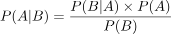

In our case, we have P (Sports | a very close game), so using this theorem we can reverse the conditional probability:

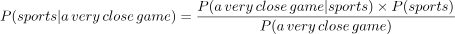

Since for our classifier we’re just trying to find out which tag has a bigger probability, we can discard the divisor —which is the same for both tags— and just compare



with



This is better, since we could actually calculate these probabilities! Just count how many times the sentence “A very close game” appears in the Sports tag, divide it by the total, and obtain P (a very close game | Sports).

There's a problem though: “A very close game” doesn’t appear in our training data, so this probability is zero. Unless every sentence that we want to classify appears in our training data, the model won’t be very useful.

Being Naive
So here comes the Naive part: we assume that every word in a sentence is independent of the other ones. This means that we’re no longer looking at entire sentences, but rather at individual words. So for our purposes, “this was a fun party” is the same as “this party was fun” and “party fun was this”.

We write this as:



This assumption is very strong but super useful. It's what makes this model work well with little data or data that may be mislabeled. The next step is just applying this to what we had before:

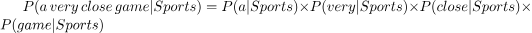

And now, all of these individual words actually show up several times in our training data, and we can calculate them!

Calculating Probabilities
The final step is just to calculate every probability and see which one turns out to be larger.

Calculating a probability is just counting in our training data.

First, we calculate the a priori probability of each tag: for a given sentence in our training data, the probability that it is Sports P (Sports) is ⅗. Then, P (Not Sports) is ⅖. That’s easy enough.

Then, calculating P (game | Sports) means counting how many times the word “game” appears in Sports texts (2) divided by the total number of words in sports (11). Therefore,



However, we run into a problem here: “close” doesn’t appear in any Sports text! That means that P (close | Sports) = 0. This is rather inconvenient since we are going to be multiplying it with the other probabilities, so we'll end up with



This equals 0, since in a multiplication if one of the terms is zero, the whole calculation is nullified. Doing things this way simply doesn't give us any information at all, so we have to find a way around.

How do we do it? By using something called Laplace smoothing: we add 1 to every count so it’s never zero. To balance this, we add the number of possible words to the divisor, so the division will never be greater than 1. In our case, the possible words are ['a', 'great', 'very', 'over', 'it', 'but', 'game', 'election', 'clean', 'close', 'the', 'was', 'forgettable', 'match'].

Since the number of possible words is 14 (I counted them!), applying smoothing we get that



**The full results are:**

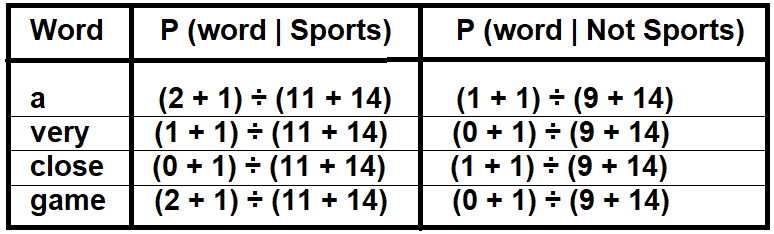

**Now we just multiply all the probabilities, and see who is bigger:**

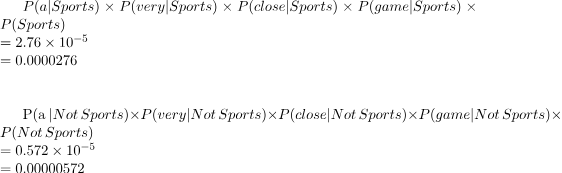

## Advanced techniques

There are many things that can be done to improve this basic model. These techniques allow Naive Bayes to perform at the same level as more advanced methods. Some of these techniques are:

- Removing stopwords: These are common words that don’t really add anything to the classification, such as a, able, either, else, ever and so on. So for our purposes, The election was over would be election over and a very close game would be very close game.

- Lemmatizing words: This is grouping together different inflections of the same word. So election, elections, elected, and so on would be grouped together and counted as more appearances of the same word.

- Using n-grams: Instead of counting single words as we did here, we could count sequences of words, like “clean match” and “close election”.

- Using TF-IDF: Instead of just counting frequency we could do something more advanced like also penalizing words that appear frequently in most of the texts.